In [ ]:
# EDA in Pandas
# EDA = Exploratory Data Analysis
# Generally speaking, it is the first step you should complete when you begin to analyze your data
# Two types of EDA: graphical and non-graphical
# Non-graphical has already been studied; in this file we'll handle graphical
# Purpose of graphical EDA: study ranges of data and relationships between variables
# Need not be professional quality; for the purposes of analysis, not presentation
# Import pandas
import pandas as pd
# Import matplotlib
import matplotlib.pyplot as plt
# Import numpy
import numpy as np
# Read in the cars csv as a DataFrame
cars = pd.read_csv("cars.csv")
# Fix first column name and check
cars = cars.rename(columns={'Unnamed: 0': 'model'})
cars.head()

In [13]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


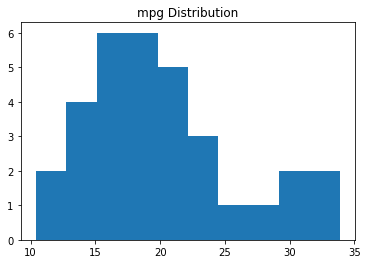

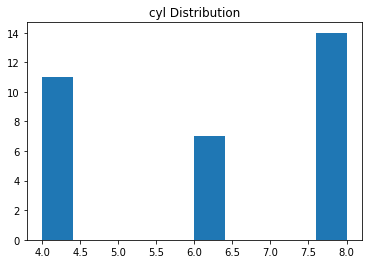

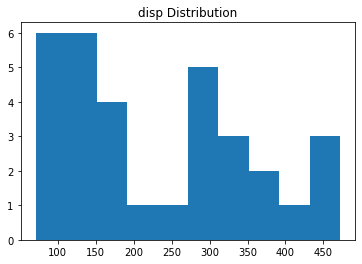

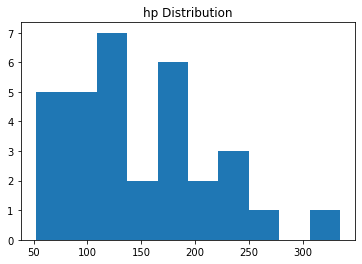

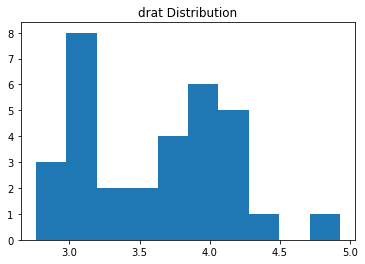

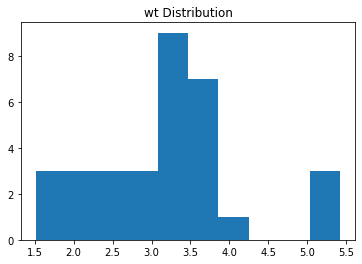

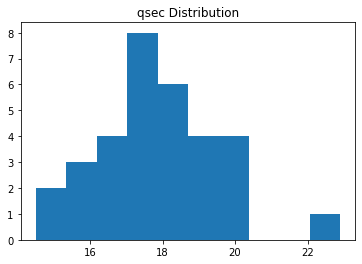

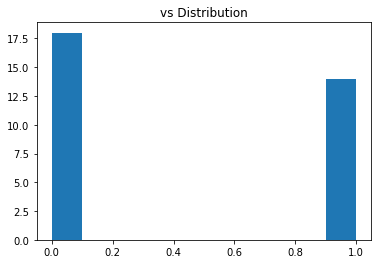

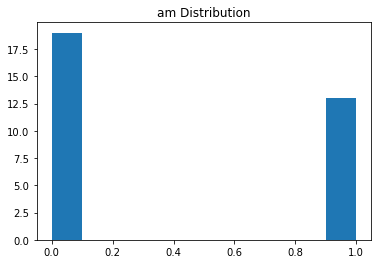

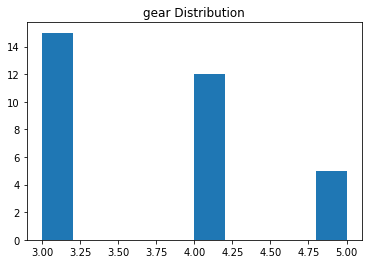

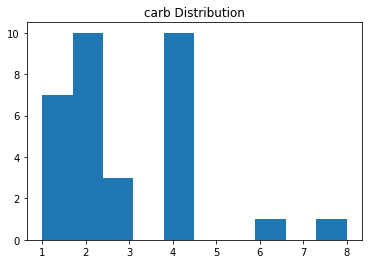

In [14]:
# DF is now ready to go. What next?
# Let's make histograms for all the quantitative values
for col in cars.columns[1:]:
    plt.hist(cars[col])
    plt.title(col + " Distribution")
    plt.show()
# The first chart shows us that mpg is mostly around 15-20
# The second chart shows us cyl mostly = 4, 6, or 8
# vs and am appear to be boolean variables stored as numbers
# Etc.

In [15]:
# It's also easy to see that there are outliers for weight and qsec
# Let's take a look at these
cars[cars["wt"] > np.percentile(cars["wt"], 90)]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
11,Merc 450SE,16.4,8,275.8,180,3.07,4.070,17.40,0,0,3,3
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


In [16]:
cars[cars["qsec"] > np.percentile(cars["qsec"], 90)]

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
20,Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1


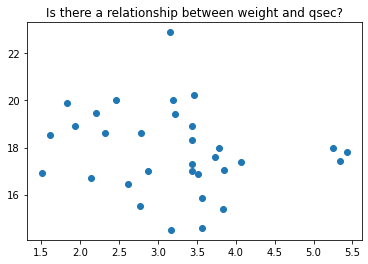

In [17]:
# Is there a relationship between weight and qsec?
plt.scatter(cars["wt"], cars["qsec"])
plt.title("Is there a relationship between weight and qsec?")
plt.show()
# It doesn't look like it!

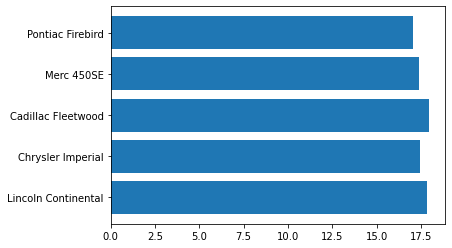

In [19]:
# What models have the highest weight?
top_wt = cars.sort_values("wt", ascending = False).head(5)
top_wt
# Look at the top weighted cars' qsecs
plt.barh(top_wt["model"], top_wt["qsec"])
plt.show()

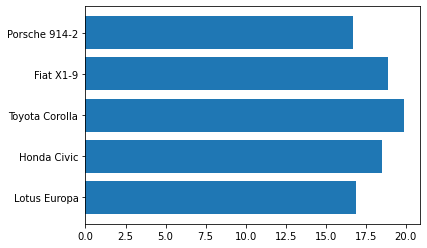

In [21]:
# What about the lowest weighted?
bot_wt = cars.sort_values("wt").head(5)
bot_wt
plt.barh(bot_wt["model"], bot_wt["qsec"])
plt.show()

In [22]:
# There appears to be some difference here, but not huge
# How big is it in the grand scheme of things?
cars["qsec"].describe()
# Maybe bigger than the scatterplot reveals...
# Low weight values are actually often higher qsec than high weight
# We have shown almost the opposite of our hypothesis!

count    32.000000
mean     17.848750
std       1.786943
min      14.500000
25%      16.892500
50%      17.710000
75%      18.900000
max      22.900000
Name: qsec, dtype: float64

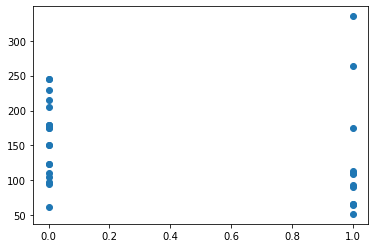

In [23]:
# Next: which types of transmission have higher horsepower?
plt.scatter(cars["am"], cars["hp"])
plt.show()
# Background knowledge: 1.0 = manual, 0.0 = automatic
# An interesting finding: the highest and lowest horsepowers are both manual!

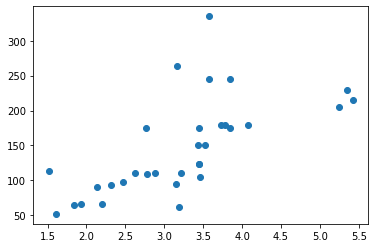

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
14,Cadillac Fleetwood,10.4,8,472.0,205,2.93,5.250,17.98,0,0,3,4
15,Lincoln Continental,10.4,8,460.0,215,3.00,5.424,17.82,0,0,3,4
16,Chrysler Imperial,14.7,8,440.0,230,3.23,5.345,17.42,0,0,3,4


In [24]:
# Do bigger cars also require more horsepower?
plt.scatter(cars["wt"], cars["hp"])
plt.show()
# This correlation looks pretty clear
# Although the heaviest cars have medium horsepower
# Which ones are these?
tanks = cars[cars["wt"] >= 5]
tanks

In [28]:
# Convert vs, am to boolean
cars['vs'] = cars['vs'].astype('bool')
cars['am'] = cars['am'].astype('bool')
cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,False,True,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,False,True,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,True,True,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,True,False,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,False,False,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,True,False,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,False,False,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,True,False,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,True,False,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,True,False,4,4
